In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [59]:
preds_im1 = [[1.06823082e+02, 1.09540062e+02, 1.15055260e+02, 1.20541702e+02,
        1.28419403e+02, 1.42929901e+02, 1.60296799e+02, 1.83383469e+02,
        2.16252045e+02, 2.48891876e+02, 2.71153137e+02, 2.87949707e+02,
        3.01864990e+02, 3.09518005e+02, 3.14824646e+02, 3.19816467e+02,
        3.22582458e+02, 1.31789978e+02, 1.44659210e+02, 1.60439529e+02,
        1.75345139e+02, 1.88828323e+02, 2.45325684e+02, 2.58784729e+02,
        2.73502686e+02, 2.89106689e+02, 3.01266846e+02, 2.17341278e+02,
        2.17508179e+02, 2.17731583e+02, 2.17732147e+02, 1.99016571e+02,
        2.06685120e+02, 2.16933273e+02, 2.27034592e+02, 2.34409317e+02,
        1.52239105e+02, 1.61767456e+02, 1.75161987e+02, 1.87382996e+02,
        1.76196487e+02, 1.62307114e+02, 2.45276169e+02, 2.57808533e+02,
        2.71524658e+02, 2.80946289e+02, 2.70777710e+02, 2.56841736e+02,
        1.79973007e+02, 1.93021286e+02, 2.08471619e+02, 2.16954163e+02,
        2.25316803e+02, 2.40471237e+02, 2.51622559e+02, 2.39447449e+02,
        2.28495132e+02, 2.16495270e+02, 2.04628311e+02, 1.93799622e+02,
        1.83791367e+02, 2.06037949e+02, 2.16553741e+02, 2.27046051e+02,
        2.49056030e+02, 2.26605972e+02, 2.16235764e+02, 2.06013245e+02],
       [2.82938477e+02, 3.12676636e+02, 3.39780762e+02, 3.64499207e+02,
        3.91830933e+02, 4.14992249e+02, 4.31070190e+02, 4.44727234e+02,
        4.52280945e+02, 4.43616089e+02, 4.29931091e+02, 4.13747620e+02,
        3.90428955e+02, 3.62859894e+02, 3.37905396e+02, 3.10961304e+02,
        2.81160095e+02, 2.60277130e+02, 2.51291214e+02, 2.49197815e+02,
        2.50837189e+02, 2.54535217e+02, 2.53789673e+02, 2.49528091e+02,
        2.47463470e+02, 2.49277588e+02, 2.58624817e+02, 2.86561310e+02,
        3.06182098e+02, 3.24897247e+02, 3.40194885e+02, 3.51292358e+02,
        3.52864044e+02, 3.54632263e+02, 3.52654388e+02, 3.50866486e+02,
        2.83317383e+02, 2.78504883e+02, 2.78608826e+02, 2.84725006e+02,
        2.88394897e+02, 2.88555328e+02, 2.84247559e+02, 2.77728394e+02,
        2.77618347e+02, 2.82476013e+02, 2.87491089e+02, 2.87653503e+02,
        3.86992889e+02, 3.78715759e+02, 3.72296539e+02, 3.73773682e+02,
        3.72258484e+02, 3.78247620e+02, 3.86642883e+02, 3.95826172e+02,
        4.01813416e+02, 4.03065277e+02, 4.01859100e+02, 3.95984192e+02,
        3.86367645e+02, 3.82339539e+02, 3.81862061e+02, 3.82255463e+02,
        3.86111511e+02, 3.89569092e+02, 3.90394165e+02, 3.89451355e+02],
       [7.98515320e+00, 7.84449768e+00, 6.83695984e+00, 8.87835693e+00,
        1.88941956e+01, 3.96474762e+01, 6.65793610e+01, 9.07069092e+01,
        9.91575012e+01, 8.83465271e+01, 6.27515717e+01, 3.49080048e+01,
        1.30253448e+01, 2.64199829e+00, 0.00000000e+00, 4.11224365e-01,
        5.75515747e-01, 1.02882065e+02, 1.20385841e+02, 1.32223633e+02,
        1.39055420e+02, 1.41720184e+02, 1.39589859e+02, 1.35955154e+02,
        1.28059006e+02, 1.15198799e+02, 9.69002762e+01, 1.40788376e+02,
        1.52303162e+02, 1.64169342e+02, 1.65644852e+02, 1.33830322e+02,
        1.39671112e+02, 1.42078629e+02, 1.39009674e+02, 1.32631866e+02,
        1.10384605e+02, 1.22832932e+02, 1.22648331e+02, 1.17878525e+02,
        1.21086212e+02, 1.18172195e+02, 1.15375130e+02, 1.19192978e+02,
        1.18971619e+02, 1.05797417e+02, 1.14264542e+02, 1.17979996e+02,
        1.16375725e+02, 1.33835510e+02, 1.42769714e+02, 1.43428146e+02,
        1.42220016e+02, 1.32260391e+02, 1.13935097e+02, 1.26818001e+02,
        1.32573807e+02, 1.34299240e+02, 1.33751648e+02, 1.28630096e+02,
        1.17611053e+02, 1.34593170e+02, 1.37155289e+02, 1.33963959e+02,
        1.15057182e+02, 1.32439743e+02, 1.33884903e+02, 1.32940369e+02]]

preds_im2 = [[1.82850204e+02, 1.79131500e+02, 1.76324005e+02, 1.76425354e+02,
        1.83277161e+02, 2.02000153e+02, 2.27899902e+02, 2.54588776e+02,
        2.73756561e+02, 2.80080719e+02, 2.70753204e+02, 2.58445404e+02,
        2.50963654e+02, 2.50286224e+02, 2.54122070e+02, 2.60653473e+02,
        2.66536041e+02, 2.69436096e+02, 2.89731018e+02, 3.05808868e+02,
        3.17067688e+02, 3.24227783e+02, 3.46034821e+02, 3.49341553e+02,
        3.49612061e+02, 3.45773956e+02, 3.35056213e+02, 3.30522919e+02,
        3.36436615e+02, 3.42644409e+02, 3.41348358e+02, 3.06999817e+02,
        3.14494476e+02, 3.20331818e+02, 3.22484833e+02, 3.20781616e+02,
        2.79862488e+02, 2.94139679e+02, 2.99595673e+02, 3.00087952e+02,
        2.97313263e+02, 2.89193726e+02, 3.21990692e+02, 3.31102173e+02,
        3.37178741e+02, 3.29600616e+02, 3.31127350e+02, 3.28214600e+02,
        2.79920044e+02, 2.99735992e+02, 3.13847748e+02, 3.17509155e+02,
        3.20370087e+02, 3.18319366e+02, 3.08445587e+02, 3.12852692e+02,
        3.12121033e+02, 3.08408386e+02, 3.03081055e+02, 2.95069397e+02,
        2.82636566e+02, 3.04862701e+02, 3.11185425e+02, 3.13141510e+02,
        3.08387909e+02, 3.12968079e+02, 3.09745972e+02, 3.04844391e+02],
       [3.13405212e+02, 3.39007202e+02, 3.62130981e+02, 3.83854736e+02,
        4.09043091e+02, 4.32153595e+02, 4.49798309e+02, 4.64559265e+02,
        4.70947632e+02, 4.61383789e+02, 4.45042175e+02, 4.26182068e+02,
        4.01944702e+02, 3.76127960e+02, 3.53875366e+02, 3.30535278e+02,
        3.04803101e+02, 3.09257721e+02, 3.04461334e+02, 3.04369965e+02,
        3.06582550e+02, 3.09892273e+02, 3.07398376e+02, 3.02811249e+02,
        2.99300873e+02, 2.98142700e+02, 3.02320953e+02, 3.36031708e+02,
        3.54923645e+02, 3.73345551e+02, 3.86973969e+02, 3.91766663e+02,
        3.94065735e+02, 3.95851471e+02, 3.93229218e+02, 3.90233948e+02,
        3.29761597e+02, 3.27502747e+02, 3.27164886e+02, 3.31289368e+02,
        3.35274506e+02, 3.35356628e+02, 3.28912872e+02, 3.23618896e+02,
        3.23369690e+02, 3.24795593e+02, 3.30865448e+02, 3.31964966e+02,
        4.19117615e+02, 4.15742004e+02, 4.11961182e+02, 4.13162659e+02,
        4.11375336e+02, 4.13814087e+02, 4.16094727e+02, 4.25020203e+02,
        4.30775085e+02, 4.32272888e+02, 4.31701599e+02, 4.26871521e+02,
        4.18546722e+02, 4.18939209e+02, 4.18844879e+02, 4.18211853e+02,
        4.15819458e+02, 4.20242462e+02, 4.21400940e+02, 4.20967743e+02],
       [1.68347778e+02, 1.63871078e+02, 1.57126495e+02, 1.51751007e+02,
        1.47223175e+02, 1.41827148e+02, 1.37235306e+02, 1.28095108e+02,
        1.05569550e+02, 7.71319427e+01, 5.14588928e+01, 2.91929474e+01,
        1.20645447e+01, 4.47027588e+00, 1.43740845e+00, 0.00000000e+00,
        4.12078857e-01, 1.86566559e+02, 1.84138641e+02, 1.76736191e+02,
        1.67754181e+02, 1.58139679e+02, 1.14267258e+02, 1.02846985e+02,
        8.86736298e+01, 7.16909790e+01, 5.47245331e+01, 1.33494385e+02,
        1.36086060e+02, 1.38764053e+02, 1.38032532e+02, 1.39312286e+02,
        1.35554382e+02, 1.28404114e+02, 1.19646500e+02, 1.11732605e+02,
        1.71793854e+02, 1.69496460e+02, 1.59116821e+02, 1.47405426e+02,
        1.56921585e+02, 1.66533325e+02, 1.02550827e+02, 9.48540039e+01,
        8.44558105e+01, 7.16049805e+01, 8.21702881e+01, 9.43413391e+01,
        1.45020630e+02, 1.41495178e+02, 1.33198868e+02, 1.26833496e+02,
        1.20222565e+02, 1.04422974e+02, 8.80743256e+01, 1.02410248e+02,
        1.12769073e+02, 1.22470627e+02, 1.31357880e+02, 1.38292816e+02,
        1.42588699e+02, 1.31244370e+02, 1.23970078e+02, 1.14710709e+02,
        9.05284729e+01, 1.14898956e+02, 1.23416641e+02, 1.31075912e+02]]

In [60]:
mean_im1 = np.mean(np.asarray(preds_im1).T, axis=0)
mean_im2 = np.mean(np.asarray(preds_im2).T, axis=0)
max_im1 = np.max(preds_im1)
max_im2 = np.max(preds_im2)
preds_im1 = (np.asarray(preds_im1).T - mean_im1)/max_im1
preds_im2 = (np.asarray(preds_im2).T - mean_im2)/max_im2
preds_im1, preds_im2 = preds_im1.T.tolist(), preds_im2.T.tolist()

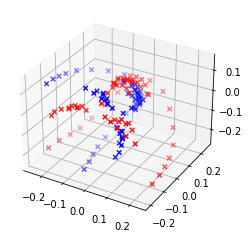

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(preds_im1[0], preds_im1[1], preds_im1[2], c='r', marker='x')
ax.scatter(preds_im2[0], preds_im2[1], preds_im2[2], c='b', marker='x')
plt.show()

In [53]:
def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform that maps corresponding points A to B in m spatial dimensions
    Input:
      A: Nxm numpy array of corresponding points
      B: Nxm numpy array of corresponding points
    Returns:
      T: (m+1)x(m+1) homogeneous transformation matrix that maps A on to B
      R: mxm rotation matrix
      t: mx1 translation vector
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
       Vt[m-1,:] *= -1
       R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t

    return T, R, t


def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        distances: Euclidean distances of the nearest neighbor
        indices: dst indices of the nearest neighbor
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
    return distances.ravel(), indices.ravel()


def icp(A, B, init_pose=None, max_iterations=20, tolerance=0.001):
    '''
    The Iterative Closest Point method: finds best-fit transform that maps points A on to points B
    Input:
        A: Nxm numpy array of source mD points
        B: Nxm numpy array of destination mD point
        init_pose: (m+1)x(m+1) homogeneous transformation
        max_iterations: exit algorithm after max_iterations
        tolerance: convergence criteria
    Output:
        T: final homogeneous transformation that maps A on to B
        distances: Euclidean distances (errors) of the nearest neighbor
        i: number of iterations to converge
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # make points homogeneous, copy them to maintain the originals
    src = np.ones((m+1,A.shape[0]))
    dst = np.ones((m+1,B.shape[0]))
    src[:m,:] = np.copy(A.T)
    dst[:m,:] = np.copy(B.T)

    # apply the initial pose estimation
    if init_pose is not None:
        src = np.dot(init_pose, src)

    prev_error = 0

    for i in range(max_iterations):
        # find the nearest neighbors between the current source and destination points
        distances, indices = nearest_neighbor(src[:m,:].T, dst[:m,:].T)

        # compute the transformation between the current source and nearest destination points
        T,_,_ = best_fit_transform(src[:m,:].T, dst[:m,:].T)

        # update the current source
        src = np.dot(T, src)

        # check error
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error

    # calculate final transformation
    T,_,_ = best_fit_transform(A, src[:m,:].T)

    return T, distances, i

In [61]:
T, dist, i = icp(np.asarray(preds_im1).T, np.asarray(preds_im2).T)
tmp = np.asarray(preds_im2 + [list([1]*68)])
new_preds_im2 = (tmp.T @ T).T

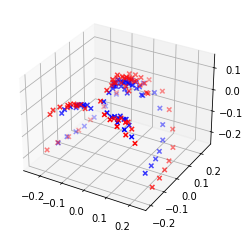

[0.05469423 0.04953225 0.04583645 0.04371622 0.04133446 0.03820869
 0.03629586 0.03767259 0.04153221 0.04171019 0.04419113 0.04897668
 0.05373928 0.05543189 0.0561639  0.05745864 0.05989023 0.04456549
 0.04472574 0.04259136 0.03968941 0.03287161 0.03230697 0.03442254
 0.03631901 0.03821016 0.03908565 0.02161677 0.01960544 0.02122047
 0.02117025 0.01332391 0.01377894 0.01381054 0.01277703 0.01186234
 0.03029243 0.0307129  0.02547461 0.01350971 0.01109654 0.02085208
 0.01590696 0.02338141 0.02718504 0.02842069 0.01841921 0.01156614
 0.02003413 0.0184516  0.01778237 0.01792035 0.01727683 0.01830588
 0.02253703 0.02714534 0.0298201  0.03016435 0.02929537 0.02576918
 0.01702479 0.01510811 0.01725262 0.01488575 0.01951301 0.00796054
 0.00816976 0.00780893]


In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(preds_im1[0], preds_im1[1], preds_im1[2], c='r', marker='x')
ax.scatter(new_preds_im2[0], new_preds_im2[1], new_preds_im2[2], c='b', marker='x')
plt.show()
print(dist)